# CS613: Natural Language Processing
## Assignment 1

In [1]:
from nltk.tokenize import TweetTokenizer,regexp_tokenize
import csv
from collections import Counter,defaultdict
import matplotlib.pyplot as plt
import numpy as np
import re
import random
from nltk.corpus import wordnet
%matplotlib inline

In [2]:
link_regex = re.compile(r'(http|(pic))(\S)*')
def link_clean(s):
    return link_regex.sub('',s)
def word_filter(s):
    return s[0].isalnum()

In [3]:
# Reading the file
with open('tweets-dataset.csv','r',encoding='utf8') as file:
    data = csv.reader(file)
    tweets = list(data)[1:]
    tweets = [tweet[0] for tweet in tweets]
#Removing link/URL
tweets = list(map(link_clean,tweets))
twttokenizer = TweetTokenizer(reduce_len=True,strip_handles=True)
# Finding all tokens
tokens = []
for tweet in tweets:
    part_tokens = regexp_tokenize(' '.join(filter(word_filter,twttokenizer.tokenize(tweet))),pattern='[a-zA-Z]+')
    tokens.extend(map(lambda s: s.lower().replace("'",''),part_tokens))
num_tokens = len(tokens) #Number of tokens
types = list(set(tokens)) #Finding types
num_types = len(types) #Number of types
print('Number of tokens:',num_tokens)
print('Number of types:',num_types)
print('Type-Token Ratio (TTR):',num_types/num_tokens)

Number of tokens: 287502
Number of types: 29863
Type-Token Ratio (TTR): 0.10387058176986595


Generating dictionary of frequencies and list of word and frequency(sorted by frequency). This is done to aid further calculations.

In [4]:
freq_dict = Counter(tokens) #Dictionary with types matched to frequency in corpus
freq_list = sorted(freq_dict.items(),key= lambda x:x[1]) #Same data as above in list format

# Zipf's Law for Length:
This law states that the word frequency($f$) is inversely proportional to the length of word($l$):
\begin{equation}
    f \: \propto \: \frac{1}{l}
\end{equation}


In [5]:
# Making frequency vs length data for graphing
w_list = ['tumhara','from','maine','saturday','day','a','be','gandhi','pakistani','congratulations']
li = []
for word in w_list:
    li.append((freq_dict[word],len(word)))
len_freq = np.asarray(sorted(li,key=lambda x: x[1]))

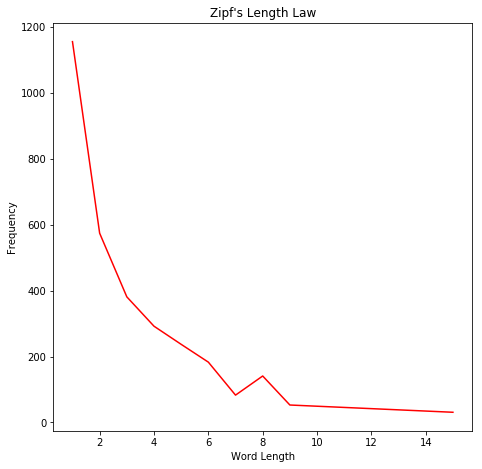

In [6]:
plt.rcParams["figure.figsize"] = (7.5,7.5)
fig, ax1 = plt.subplots(1,1)
ax1.plot(len_freq[:,1],len_freq[:,0], 'r')
ax1.set_title("Zipf's Length Law")
ax1.set_ylabel('Frequency')
ax1.set_xlabel('Word Length')
plt.show()

The graph obtained is approximately hyperbolic. Therefore, the Zipf's law for lengths holds.

# Zipf's Law for Meanings:
This law states that the number of meanings($m$) and square root of frequency($f$) are directly proportional:
\begin{equation}
    m \: \propto \: \sqrt{f}
\end{equation}

In [7]:
# Making frequency vs meaning data for graphing
meaning_dict = defaultdict(set)
for i in types:
    for syn in wordnet.synsets(i):
        for j in syn.lemmas():
            meaning_dict[i].add(j.name())
random_words=['best','can','know','think','great','live','well','fans','garbage','november']
li = []
for word in random_words:
    li.append((freq_dict[word],len(meaning_dict[word])))
mean_freq = np.asarray(sorted(li))

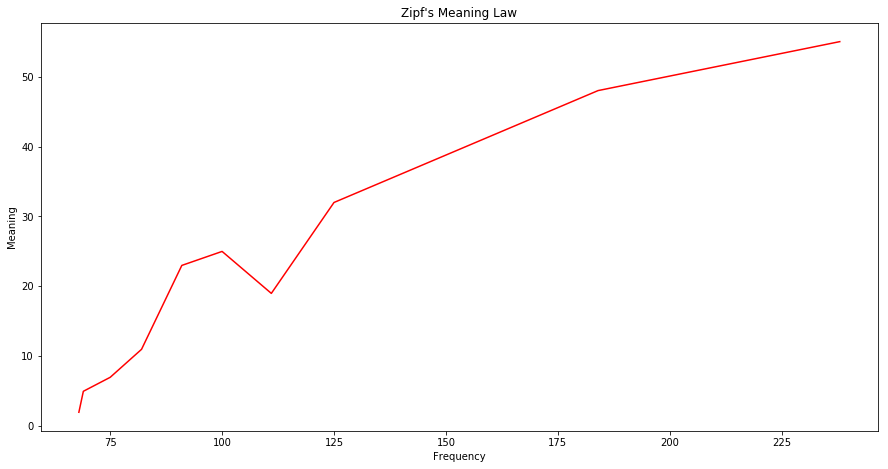

In [8]:
plt.rcParams["figure.figsize"] = (15,7.5)
fig, ax1 = plt.subplots(1,1)
ax1.plot(mean_freq[:,0],mean_freq[:,1], 'r')
ax1.set_title("Zipf's Meaning Law")
ax1.set_ylabel('Meaning')
ax1.set_xlabel('Frequency')
plt.show()

The graph obtained looks fairly similar to a parabola with horizontal axis. Therefore, the Zipf's law for meaning holds to some degree.

# Heap's Law:
This law states that the size of vocabulary($|V|$) and number of tokens($N$) satisfies the following relation:
\begin{equation}
    |V| = KN^{\beta}
\end{equation}
Expected values are typically $K \approx 10-100$ and $\beta \approx 0.4-0.6$.

In [9]:
voc_size = [0 for i in range(num_tokens+1)]
vocabulary = set() #Maintains current vocabulary for each iteration
for i in range(1,num_tokens+1):
    vocabulary.add(tokens[i-1])
    voc_size[i] = len(vocabulary)

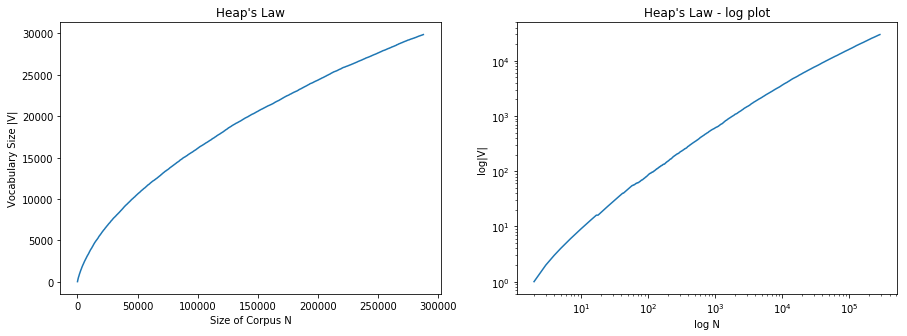

In [10]:
plt.rcParams["figure.figsize"] = (15,5)
fig, (ax1,ax2) = plt.subplots(1,2)
ax1.plot([i for i in range(num_tokens+1)], voc_size)
ax1.set_title("Heap's Law")
ax1.set_ylabel('Vocabulary Size |V|')
ax1.set_xlabel('Size of Corpus N')
ax2.plot([i for i in range(2,num_tokens+1)], voc_size[2:])
ax2.set_xscale('log', basex=10)
ax2.set_yscale('log', basey=10)
ax2.set_title("Heap's Law - log plot")
ax2.set_ylabel('log|V|')
ax2.set_xlabel('log N')
plt.show()

In [11]:
# Finding parameters beta and K for Heap's Law
X = np.log([i for i in range(2,num_tokens+1)])
Y = np.log(voc_size[2:])
beta, log_k = np.polyfit(X,Y,1)
k = np.exp(log_k)
print("Beta:",beta)
print("K:",k)

Beta: 0.6444087372499978
K: 9.486168579858205


The constants $\beta = 0.6444$ and $K = 9.4862$ are close to the expected range for Heap's law.